## Q1) Salary_hike -> Build a prediction model for Salary_hike .Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading a csv file using pandas library
dataset=pd.read_csv("Salary_Data.csv")
dataset.head()
# x=YearsExperience, y=Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA(Explotary data analysis)

In [3]:
#Data Structure
dataset.shape

(30, 2)

In [4]:
#data types
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
# There are no null values 

### Duplicates

In [7]:
#Count of duplicated rows
dataset[dataset.duplicated()].shape

(0, 2)

In [8]:
# Renaming Columns
dataset=dataset.rename({'YearsExperience':'Exp'},axis=1)
dataset.head()

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Data Visualization

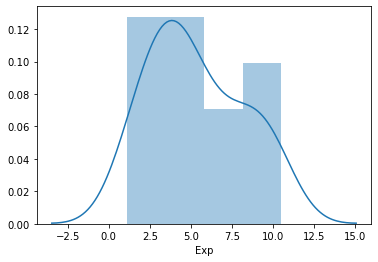

In [9]:
sns.distplot(dataset['Exp'])

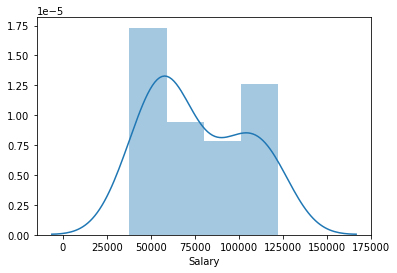

In [10]:
sns.distplot(dataset['Salary'])

### Outlier Detection

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

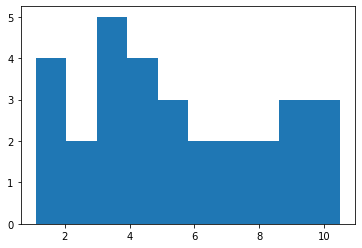

In [11]:
plt.hist(dataset['Exp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19fad957d60>,
 'caps': [<matplotlib.lines.Line2D at 0x19fad967490>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fad957a00>],
 'medians': [<matplotlib.lines.Line2D at 0x19fad967b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fad967e50>],
 'means': []}

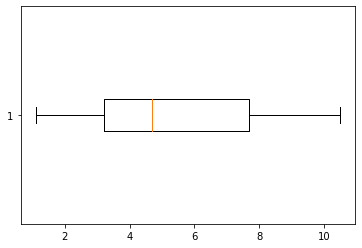

In [12]:
plt.boxplot(dataset['Exp'],0,"rs",0)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

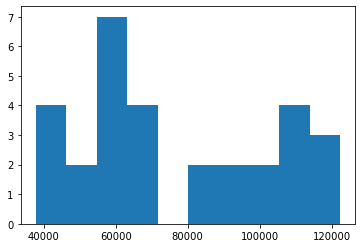

In [13]:
plt.hist(dataset['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19fada25340>,
 'caps': [<matplotlib.lines.Line2D at 0x19fada25a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fada19fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x19fada30100>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fada30400>],
 'means': []}

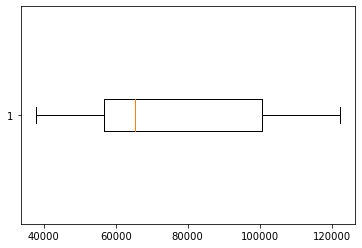

In [14]:
plt.boxplot(dataset['Salary'],0,"rs",0)

In [15]:
dataset.describe()

,Exp,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Scatter plot and Correlation analysis

#### Correlation Analysis

In [16]:
dataset.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


In [17]:
# or using numpy
np.corrcoef(dataset['Exp'],dataset['Salary'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [18]:
# 0.9782416184887598 
# correlation value between X and Y

#### Scatter plot

Text(0, 0.5, 'Salary')

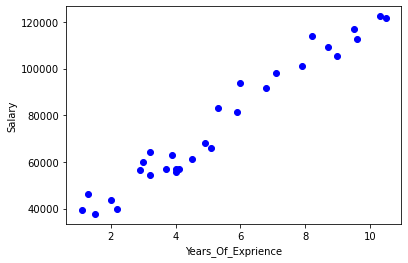

In [19]:
plt.plot(dataset.Exp,dataset.Salary,"bo");
plt.xlabel("Years_Of_Exprience");
plt.ylabel("Salary")

#or

#sns.scatterplot(x=dataset['Exp'],y=dataset['Salary'])

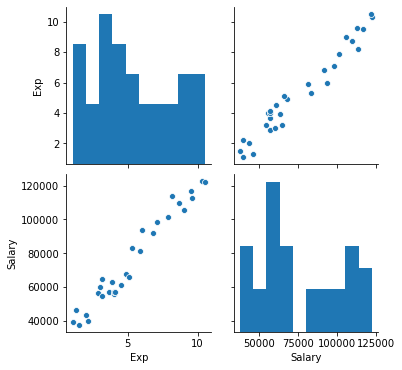

In [20]:
import seaborn as sns
sns.pairplot(dataset) # gives the histogram and the scatter plot between the two variables

### Model Building

In [21]:
# For preparing linear regression model we need to import the statsmodels.formula.api

In [22]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~Exp",data=dataset).fit()

### Model Testing

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        13:57:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Adj. R-squared:                  0.955

In [25]:
# Finding Coefficient parameters
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [26]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    11.346940
 Exp          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 Exp          1.143068e-20
 dtype: float64)

In [27]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [28]:
## Predicted values of Delivery Time using the model for entire dataset
pred=model.predict(dataset)
pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [29]:
#Adding the column name 
pred = pd.DataFrame (model.predict(dataset), columns=['Predicted_Salary'])
#pred.head()

In [30]:
pred1 = pd.concat([dataset, pred], axis=1)
pred1.head()

,Exp,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [31]:
#Error
Error = pd.DataFrame ((pred1['Salary']- pred1['Predicted_Salary']), columns=['Error'])

In [32]:
final = pd.concat ([pred1, Error], axis=1)
final.head()

,Exp,Salary,Predicted_Salary,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [33]:
# Visualization of regresion line over the scatter plot of YearsExperience and Salary

Text(0, 0.5, 'Salary')

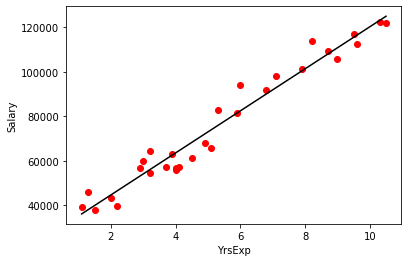

In [64]:
plt.scatter(x=dataset['Exp'],y=dataset['Salary'],color='red')
plt.plot(dataset['Exp'],pred,color='black')
plt.xlabel('YrsExp')
plt.ylabel('Salary')

#or

#sns.regplot(x=dataset['Exp'],y=dataset['Salary'])

In [35]:
dataset.corr() # 0.9782416184887599

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


### Transformating variables for accuracy

In [65]:
model2 =  smf.ols("Salary~np.log(Exp)",data=dataset).fit()

In [66]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.25e-13
Time:                        14:00:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Adj. R-squared:                  0.849

In [40]:
# Finding Coefficient parameters
model2.params

Intercept      14927.97177
np.log(Exp)    40581.98796
dtype: float64

In [41]:
# Finding tvalues and pvalues
model2.tvalues , model2.pvalues

(Intercept       2.895135
 np.log(Exp)    12.791989
 dtype: float64,
 Intercept      7.268813e-03
 np.log(Exp)    3.250155e-13
 dtype: float64)

In [42]:
# Finding Rsquared Values
model2.rsquared , model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

# Model Predictions

In [43]:
#Prediction for the entire dataset
pred2=model2.predict(dataset)
pred2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [44]:
pred2.corr(dataset.Salary)

0.9240610817882637

In [45]:
pred2 = pd.DataFrame (model2.predict(dataset), columns=['Predicted_Salary2'])
pred2.head()

,Predicted_Salary2
0,18795.848339
1,25575.235192
2,31382.551905
3,43057.262306
4,46925.138875


In [46]:
pred21 = pd.concat([dataset,pred2 ], axis=1)
pred21.head()

,Exp,Salary,Predicted_Salary2
0,1.1,39343.0,18795.848339
1,1.3,46205.0,25575.235192
2,1.5,37731.0,31382.551905
3,2.0,43525.0,43057.262306
4,2.2,39891.0,46925.138875


In [47]:
#Error
Error2 = pd.DataFrame ((pred21['Salary']- pred21['Predicted_Salary2']), columns=['Error'])
#Error2

In [48]:
final2 = pd.concat ([pred21, Error2], axis=1)
final2.head()

,Exp,Salary,Predicted_Salary2,Error
0,1.1,39343.0,18795.848339,20547.151661
1,1.3,46205.0,25575.235192,20629.764808
2,1.5,37731.0,31382.551905,6348.448095
3,2.0,43525.0,43057.262306,467.737694
4,2.2,39891.0,46925.138875,-7034.138875


Text(0, 0.5, 'Salary')

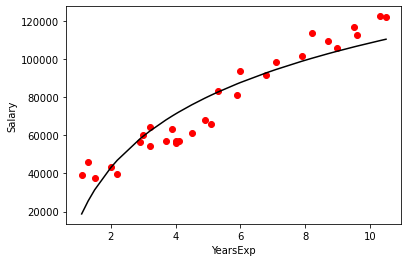

In [49]:
plt.scatter(x=dataset['Exp'],y=dataset['Salary'],color='red')
plt.plot(dataset['Exp'],pred2,color='black')
plt.xlabel('YearsExp')
plt.ylabel('Salary')

# Exponential transformation

In [50]:
model3 = smf.ols("np.log(Salary)~Exp",data=dataset).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           7.03e-18
Time:                        13:57:22   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Exp            0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Finding Coefficient parameters
model3.params

Intercept    10.507402
Exp           0.125453
dtype: float64

In [53]:
# Finding tvalues and pvalues
model3.tvalues , model3.pvalues

(Intercept    273.327166
 Exp           19.584833
 dtype: float64,
 Intercept    1.604634e-49
 Exp          7.027439e-18
 dtype: float64)

In [54]:
# Finding Rsquared Values
model3.rsquared , model3.rsquared_adj

(0.9319671194084195, 0.9295373736730059)

# Model Predictions

In [55]:
#Prediction for the entire dataset
pred3=model3.predict(dataset)
pred3.head()

0    10.645400
1    10.670491
2    10.695581
3    10.758308
4    10.783398
dtype: float64

In [56]:
pred31=np.exp(pred3) 
pred31.head()

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

In [57]:
pred31.corr(dataset.Salary)

0.9660469705377085

In [58]:
pred31 = pd.DataFrame (np.exp(pred3), columns=['Predicted_Salary3'])
pred31.head()

,Predicted_Salary3
0,41998.957468
1,43066.066794
2,44160.289228
3,47019.029189
4,48213.688474


In [59]:
pred32 = pd.concat([dataset,pred31], axis=1)
pred32.head()

,Exp,Salary,Predicted_Salary3
0,1.1,39343.0,41998.957468
1,1.3,46205.0,43066.066794
2,1.5,37731.0,44160.289228
3,2.0,43525.0,47019.029189
4,2.2,39891.0,48213.688474


In [60]:
#Error
Error3 = pd.DataFrame ((pred32['Salary']- pred32['Predicted_Salary3']), columns=['Error3'])
#Error3

In [61]:
final3 = pd.concat ([pred32, Error3], axis=1)
final3.head()

,Exp,Salary,Predicted_Salary3,Error3
0,1.1,39343.0,41998.957468,-2655.957468
1,1.3,46205.0,43066.066794,3138.933206
2,1.5,37731.0,44160.289228,-6429.289228
3,2.0,43525.0,47019.029189,-3494.029189
4,2.2,39891.0,48213.688474,-8322.688474


Text(0, 0.5, 'Salary')

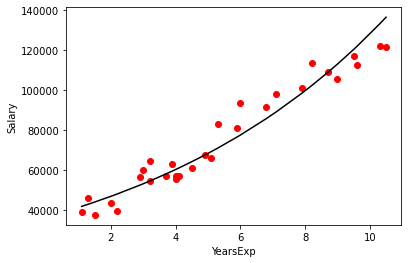

In [62]:
plt.scatter(x=dataset['Exp'],y=dataset['Salary'],color='red')
plt.plot(dataset['Exp'],pred31,color='black');
plt.xlabel('YearsExp');
plt.ylabel('Salary')

### Inference
- We can see without any transformation, the 1st model is giving accuracy having the highest R-squared value